In [2]:
import numpy as np
import jax.numpy as jnp
import jax

import scoobpsf.jax_dm as jdm
from scoobpsf.imshows import *

from importlib import reload

Nact = 34
Nacts = 952
act_spacing = 300*u.um

Unable to import ray; no parallelized propagation functionality available.


An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


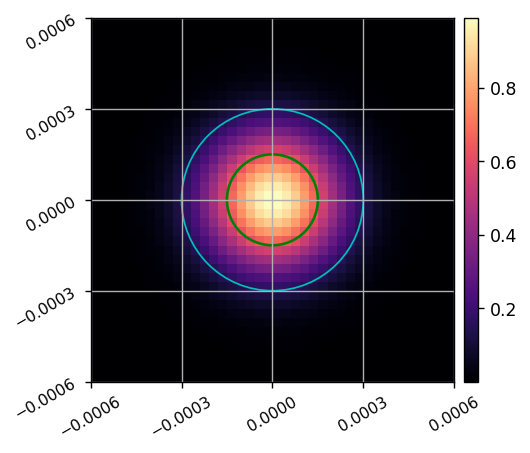

In [3]:
# reload(scoobpsf.jax_dm)
reload(jdm)
inf_fun, inf_sampling, inf_pixelscale = jdm.make_gaussian_inf_fun(sampling=10, Nacts_per_inf=4, plot=True)

In [4]:
inf_fun.shape, inf_pixelscale

((40, 40), <Quantity 3.e-05 m / pix>)

/home/kianmilani/miniconda3/envs/cpu311env/lib/python3.11/site-packages/jax/_src/ops/scatter.py:94: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=int64 to dtype=bool with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn("scatter inputs have incompatible types: cannot safely cast "


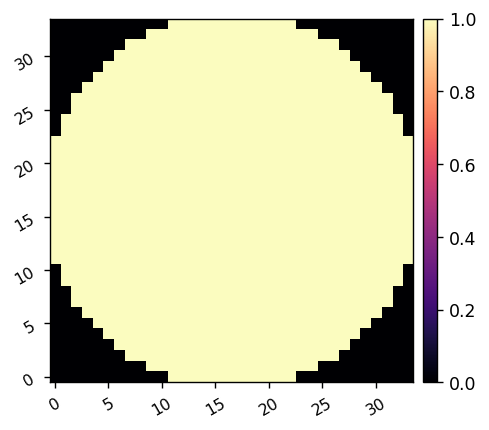

952


In [5]:
reload(jdm)
dm_mask = jdm.make_dm_mask(plot=True)
print(dm_mask.sum())

In [12]:
reload(jdm)
inf_matrix = jdm.make_inf_matrix(inf_fun, inf_sampling, dm_mask)

2023-10-14 17:55:42.061397: E external/org_tensorflow/tensorflow/compiler/xla/python/pjit.cc:461] fastpath_data is none


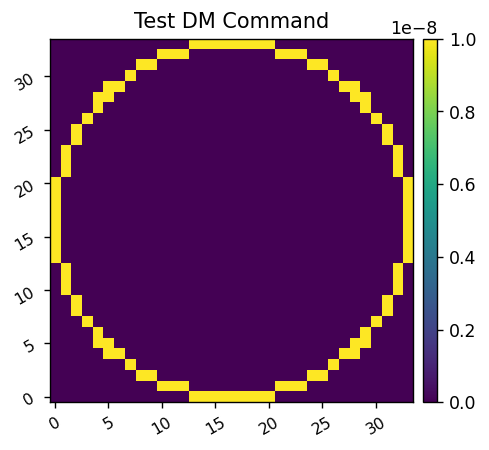

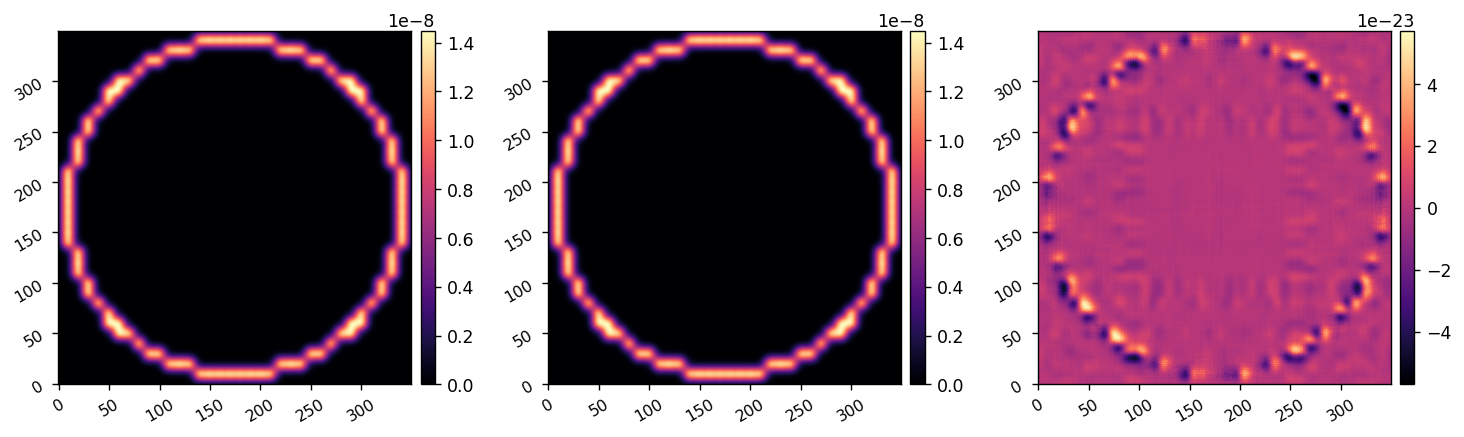

In [39]:
reload(jdm)
Nact = 34
xx = (np.linspace(0, Nact-1, Nact) - Nact/2 + 1/2)
x,y = np.meshgrid(xx,xx)
r = np.sqrt(x**2 + y**2)
ring_command = np.asarray((r<Nact//2)*(r>(Nact//2-1)), dtype=np.float64)
ring_command *= 1e-8
command = jnp.array(ring_command)
imshow1(ensure_np_array(command), 'Test DM Command', cmap='viridis')

test_surf = jdm.get_surf(command, inf_fun, inf_sampling)
imshow3(test_surf, jnp.rot90(jnp.rot90(test_surf)), test_surf-jnp.rot90(jnp.rot90(test_surf)) )



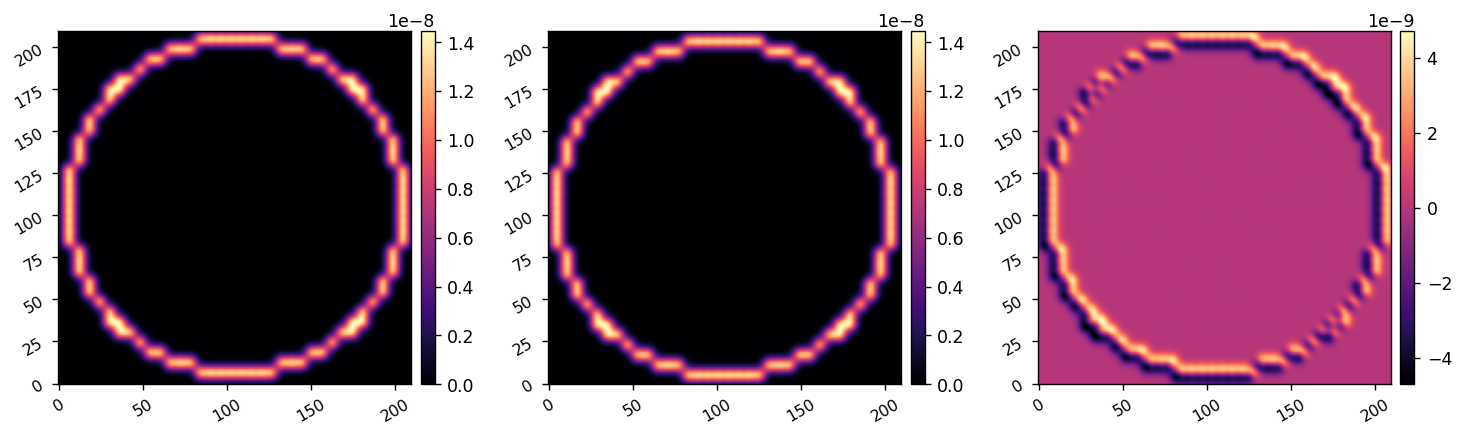

In [40]:
test_surf = jdm.get_surf(command, inf_fun, inf_sampling, inf_pixelscale=inf_pixelscale, pixelscale=50*u.um/u.pix,)
imshow3(test_surf, jnp.rot90(jnp.rot90(test_surf)), test_surf-jnp.rot90(jnp.rot90(test_surf)) )

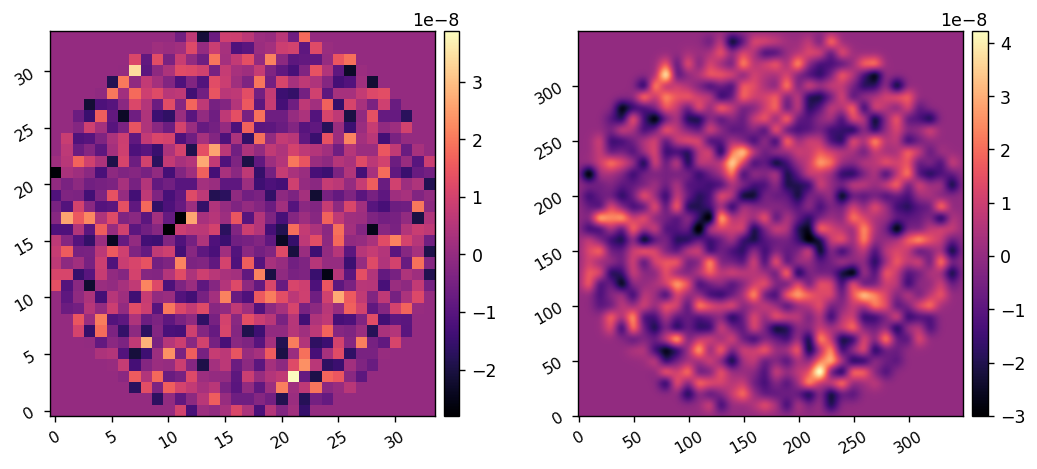

In [46]:
actuators = jnp.array(np.random.randn(Nacts)*1e-8)
command = jdm.map_actuators_to_command(actuators, dm_mask)
surf = jdm.get_surf(command, inf_fun, inf_sampling)
imshow2(command, surf)

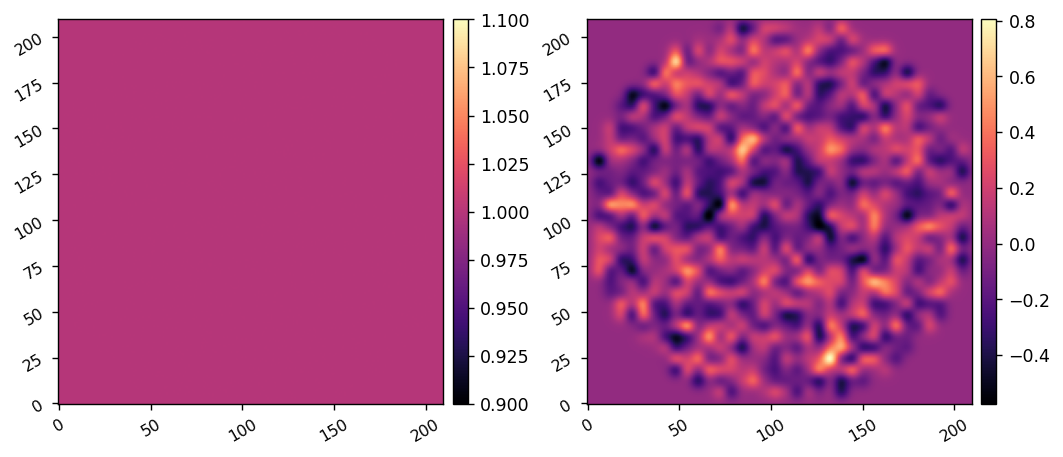

In [47]:
reload(jdm)
phasor = jdm.get_phasor(command, inf_fun, inf_sampling, inf_pixelscale=inf_pixelscale, pixelscale=50*u.um/u.pix)

imshow2(jnp.abs(phasor), jnp.angle(phasor))